# Quantum Teleportation Demo

Here we have a Demo of the Quantum Teleportation Protocol. If you are confused on how the quantum teleportation protcol works here are two videos to help you understand how this function works. 
<br><br> 1) https://www.youtube.com/watch?v=rp156j0Fgug
<br> 2) https://www.youtube.com/watch?v=w0fuyeZ9bVM
<br><br>
This file is broken up into two main pieces. The first defines functions Such as SetPlus, SetMinus, and Prepare Random Message. These files are meant for testing Purposes to Send Classical Messages 1 and 0 which can be Teleported. Then, there is Prepare Random Message. This file Prepares a Random Message that randomly chooses a number between 1 and 0. <br><br>Then, the Operation Sets this Qubit to be 1 or 0, and this message will be teleported in the Teleported Function. 
<br><br>
Finally, in our efforts to have Q# execute, compile, and display all on one interface a driver was written with ApplyTeleportRandomMessage to execute the entire file.

***File is from above videos***
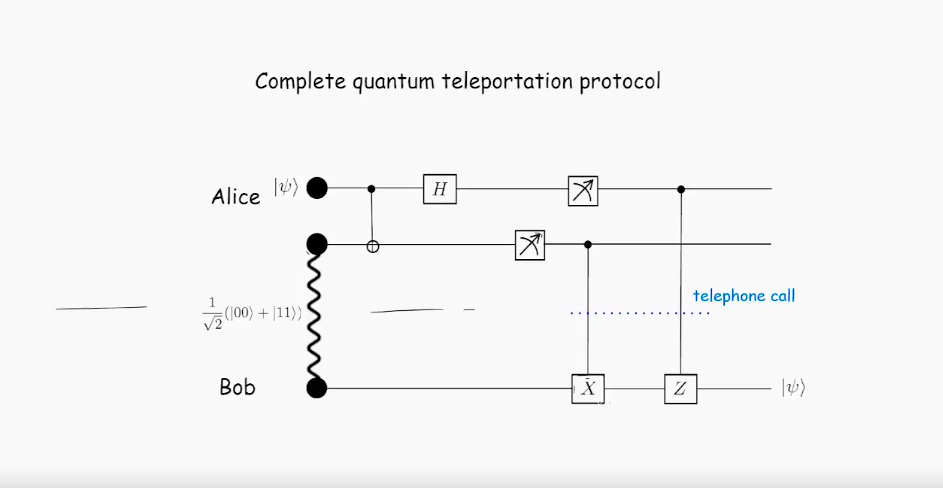

In [1]:
open Microsoft.Quantum.Math;
open Microsoft.Quantum.Diagnostics;
/// # Summary
/// Sets the qubit's state to |+⟩
operation SetPlus(q: Qubit) : Unit {
    Reset(q);
    H(q);
    Message("SetPlus WaveForm....");
    DumpMachine();
}

/// # Summary
/// Sets the qubit's state to |-⟩
operation SetMinus(q: Qubit) : Unit {
    Reset(q);
    X(q);
    H(q);
    Message("SetMinus WaveForm....");
    DumpMachine();
}

/// # Summary
/// Randomly prepares the qubit into |+⟩ or |-⟩
operation PrepareRandomMessage(q: Qubit) : Unit {

    let choice = RandomInt(2);

    if (choice == 0) {
        Message("Prepared |-⟩");
        SetMinus(q);
    } else {
        Message("Prepared |+⟩");
        SetPlus(q);
    }
}

operation Teleport (msg : Qubit, target : Qubit) : Unit {     
    using (register = Qubit()) {
    H(register);
    CNOT(register, target);
    //Qubits now are entangled created Bell State
         
    CNOT(msg, register);
    H(msg);

    //Collapse Wave Functions 
    let data1 = M(msg);
    let data2 = M(register);
    
    let data1_bool = Microsoft.Quantum.Convert.ResultAsBool(data1);
    let data2_bool = Microsoft.Quantum.Convert.ResultAsBool(data2);
    
    let data1_string = Microsoft.Quantum.Convert.BoolAsString(data1_bool);
    let data2_string = Microsoft.Quantum.Convert.BoolAsString(data2_bool);
   
    Message("Here is the Measurement Value from the Msg");
    Message(data1_string);
    Message("Here is the Measurement Value from the Control Bit");
    Message(data2_string);
    
    
    Message("Wave Functions Have Been Collapsed....Deciding On Corrections for Wave Function....");
    // decode the message by applying the corrections on
    // the target qubit accordingly:
    if (data1 == One) { Message ("Correction: Applied Z gate"); Z(target); }
    if (data2 == One) { Message ("Correction: Applied X gate"); X(target); }

    Reset(register);
    }
}
operation IsPlus(q: Qubit) : Bool {
    return (Measure([PauliX], [q]) == Zero);
}
operation IsMinus(q: Qubit) : Bool {
        return (Measure([PauliX], [q]) == One);
}

IsMinus, IsPlus, PrepareRandomMessage, SetMinus, SetPlus, Teleport

In [2]:
/// # Summary
/// Uses teleportation to send a randomly picked |-> or |+> state
/// to another.
open Microsoft.Quantum.Diagnostics;
operation TeleportRandomMessage () : Unit {

    using (qubits = Qubit[2]) {

        // Ask for some qubits that we can use to teleport.
        let msg = qubits[0];
        let target = qubits[1];

        PrepareRandomMessage(msg);

        // Use the operation we defined above.
        Teleport(msg, target);

        // Report message received:
        if (IsPlus(target))  { DumpMachine(); Message("Received |+>"); }
        if (IsMinus(target)) { DumpMachine(); Message("Received |->"); }

        // Reset all of the qubits that we used before releasing
        // them.
        ResetAll(qubits);
    }
}

TeleportRandomMessage

#### Below You Should See That A State Was Prepared And That Same State Was Received. Keep Simulating Until You Have Verified That Both States Have Been Simulated Properly:

In [3]:
%simulate TeleportRandomMessage

Prepared |-⟩
SetMinus WaveForm....
# wave function for qubits with ids (least to most significant): 0;1
0:	0.707106781186548	0
1:	-0.707106781186548	0
2:	0	0
3:	0	0
Here is the Measurement Value from the Msg
False
Here is the Measurement Value from the Control Bit
True
Wave Functions Have Been Collapsed....Deciding On Corrections for Wave Function....
Correction: Applied X gate
# wave function for qubits with ids (least to most significant): 0;1
0:	0.707106781186548	0
1:	0	0
2:	-0.707106781186548	0
3:	0	0
Received |->


()

Questions For Comprehension: 
<br><br>
1) Lets say Bob sends Alice a message. However, Alice has no idea what a and B are from Bob's message. Can she attain them?
<br><br>
2) What is alpha and beta if a Qubit has the Reset() function applied to it? 
<br><br>
3) What would happen if the Hadamard Gate On the SetPlus Function was commented out? Looking at the Prepared and Received Signals what would be the Received Message and Why? 
<br><br>
4) What if the Hadamard Gate on the SetMinus Function was commented out? Would that result in a Prepared and Receieved Error? If so, why and prove it. If not why and prove it.
<br><br>
5) After the Qubits are entangled a Hadamard Gate Should be Used. What happens if it doesn't get used? Will it result in an error. If so, prove it. If Not, prove it. 



Answer: 
<br><br>
1) No, Qubits are not directly observable. 
<br><br>
2) 0 state has probablity of 1 and 1 state has probability of 0. 
<br><br>
3) Does not fail for (-) and fails for (+). 
<br><br>
4) Does not fail for (+) and fails for (-).
<br><br>
5) Does not fail for (-) and fails for (+).